<a href="https://colab.research.google.com/github/Sanjeevhegde009/Yes-Bank-closing-price-prediction/blob/main/Yes_Bank_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np                      #import numpy module
from numpy import math
import pandas as pd                     #import pandas module
import matplotlib.pyplot as plt         #import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from xgboost import XGBRegressor
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error)

In [2]:
from google.colab import drive    #importing google drive

In [3]:
drive.mount('/content/drive')     #mounting google drive

Mounted at /content/drive


In [4]:
data= pd.read_csv('/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv')    #specifying the file to be analysed using path and file name

In [5]:
data.head()     #checking the top 5 rows of the data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
data.tail()     #checking the last five rows of the data set

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [8]:
data.columns.tolist()    #fetching the list of columns in the data set

['Date', 'Open', 'High', 'Low', 'Close']

# **Column description**
The given data consists of 5 columns. They include:
1. Date: The month against which Open, High, Low and Close prices of Yes Bank stock are plotted.
2. Open: Opening price of the stock on the specified date. In this case, start of the month
3. High: Highest price attained by the Yes Bank stock during the monthly period
4. Low: Lowest price attained by the Yes Bank stock during the monthly period
5. Close: Closing price of the Yes Bank stock at the end of the month



# **Exploratory Data Analysis**

In [9]:
data.info()   #checking the information regarding the given data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


It can be seen that the data set contains 4 numeric values and one object that is the month against which price data is collected. There are a total of 185 entries in the given data set

In [17]:
data.isnull().sum()     #checking for null values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Hence, there are no null values in the data set

In [19]:
data.nunique()    #checking repeated entries of data for same month

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

It can be seen that out of 185 entries for dates, all of them are unique. Hence, the given data set contains unique values only

In [12]:
data.describe()       #obtaining statistical description of the given data and making initial comments

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


From above statistical description of the data set during the period of data collection, we can infer:
1. Highest price recorded by Yes Bank is Rs. 404
2. Lowest price recorded by Yes Bank is Rs. 5.55
3. Mean closing price is Rs. 105 with a standard deviation of Rs. 98.58 indicating violent movements in the stock

In [22]:
data.dtypes       #fetching the data type for each feature

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

It can be noted that Date column is object type data which needs to converted into Date type with format mm-yy

In [28]:
from datetime import datetime       #importing datetime library
ohlc_data= data.copy()              #creating a copy of the original data for performing EDA operations
ohlc_data['Date']= ohlc_data['Date'].apply( lambda x: datetime.strptime(x, '%b-%y'))      #converting string data of date column to datetime format

In [30]:
ohlc_data.info()    #checking for succesful conversion into datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Hence, it can be seen that appropriate data types are now assigned to the features.

Lets now see the distribution of the target variable i.e., the closing price against various other parameters

Text(0, 0.5, 'Closing price on Rs.')

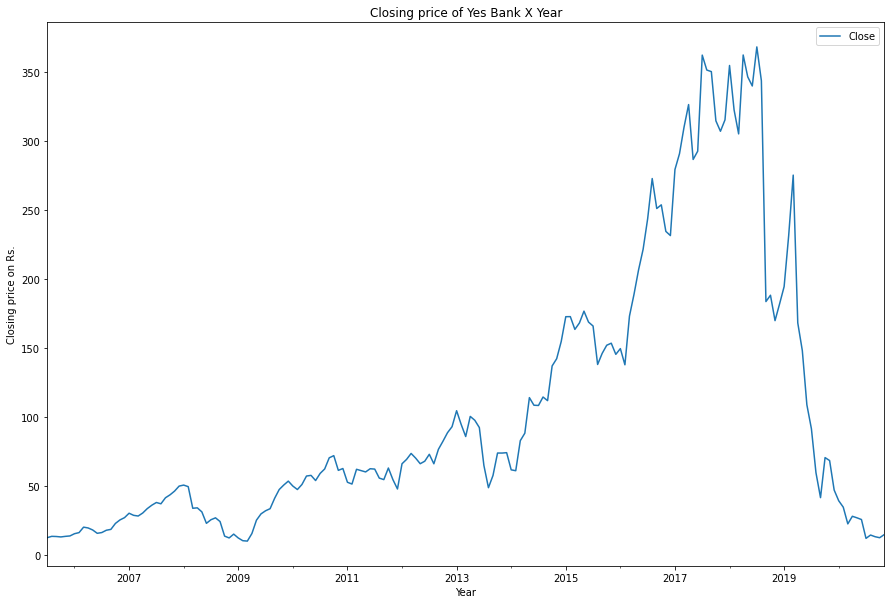

In [53]:
#plotting closing price against date
plt.rcParams['figure.figsize']= (15,10)                               #setting figure size
ohlc_data.plot(kind="line", x="Date", y="Close")                      #plotting linegraph
plt.title("Closing price of Yes Bank X Year")                         #title for the plot
plt.xlabel("Year")                                                    #Xlabel for the plot
plt.ylabel("Closing price on Rs.")                                    #Ylabel for the plot

From the above figure, it is clearly seen that Yes Bank price has been in an uptrend until around mid of 2018. However, after 2018 a massive fall of the stock price is seen due to fraud cases involving the company's then MD and CEO Mr. Rana Kapoor

Text(0.5, 0, 'Closing price in Rs.')

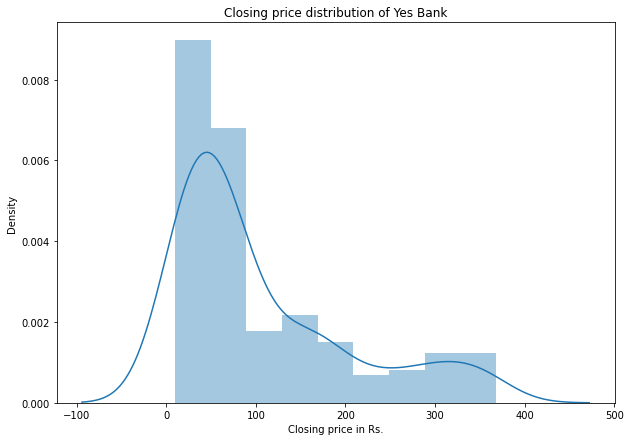

In [54]:
#plotting histogram to check the distribution of the closing price
plt.figure(figsize=(10,7))                                  #setting figure size
sns.distplot(ohlc_data['Close'])                            #plotting histogram with smoothed distribution curve
plt.title("Closing price distribution of Yes Bank")         #title for the plot
plt.xlabel("Closing price in Rs.")                          #xlabel title for the plot